***SCORING***

<a id="sec1"></a>
# [Description](#sec1)

Enter text here

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

client_id -  client ID

education - the level of education

sex - borrowe's gender

age - borrowers age

car - has(has no) car

car_type - flag of car type

decline_app_cnt - number of rejected past applications

good_work - good job flag

bki_request_cnt - number of requests to Credit bureau

home_address - home address categorizer 

work_address - work address categorizer 

income - borrower's income

foreign_passport - has (has no) traveling passport

default - has (has no) default

<a id="sec2"></a>
# [INDEX](#sec2)
1. [Description](#sec1)
    * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Load and Chek the Dataset](#sec4)

<a id="sec3"></a>
# [IMPORT LIBRARRIES](sec3)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

<a id="sec4"></a>
# [Load and Chek the Dataset](#sec4)

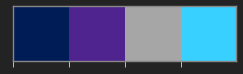

In [9]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

In [6]:
df = pd.read_csv('train.csv')
df.sample(3)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
19459,51927,SCH,F,48,N,N,0,0,1,1,2,8000,N,0
41804,13015,SCH,F,44,N,N,0,0,3,1,2,17000,Y,0
62517,79199,GRD,M,23,Y,Y,1,1,4,1,1,90000,Y,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


<AxesSubplot:xlabel='default', ylabel='count'>

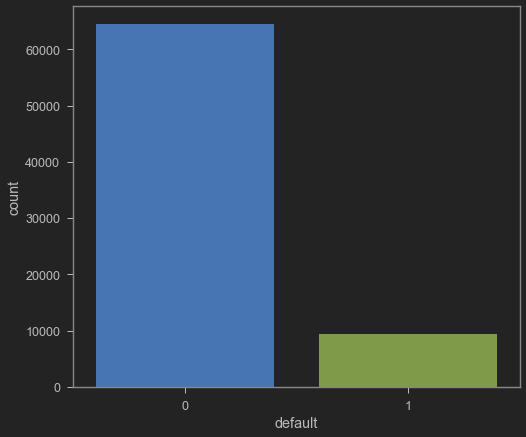

In [10]:
sns.countplot(x='default', data=df)

We may see that our data is not balanced. We have more clients who pay back their loan, which is logically correct. 

However, we need to take care about it in the future model evaluation.

Chek missing data

In [11]:
df.isnull().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

Let's fix missing data

In [15]:
df['education'] = df['education'].fillna(
    df['education'].value_counts().index[0])

In [16]:
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [20]:
bin_cols = ['sex','car','car_type','good_work','foreign_passport']
cat_cols = ['education','home_address','work_address']
num_cols = ['age','decline_app_cnt','income','bki_request_cnt']

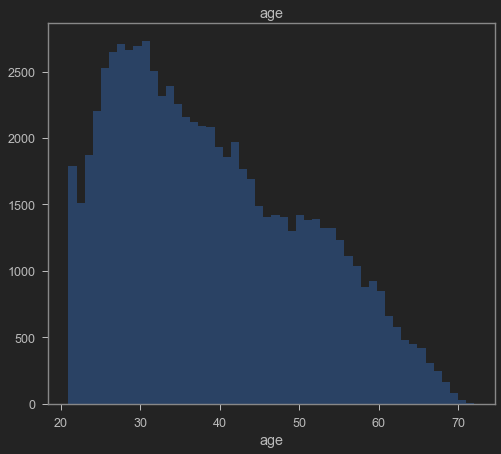

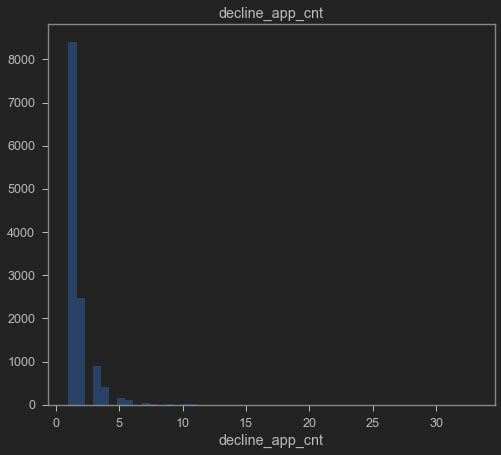

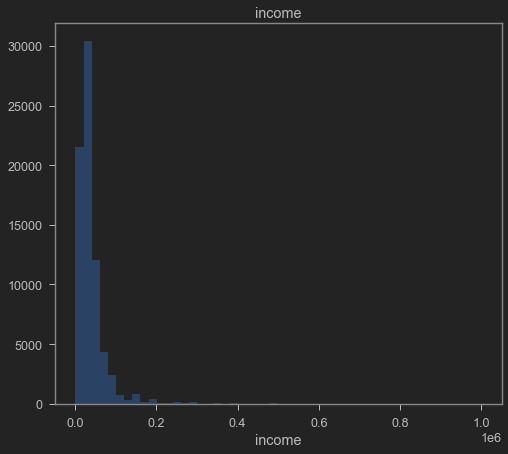

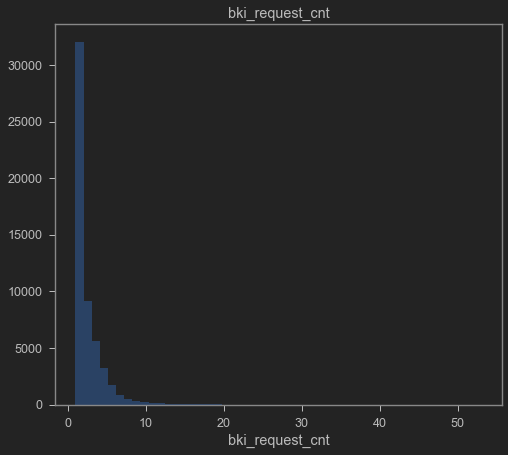

In [23]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [42]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,y='default',
                data=df[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index)],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

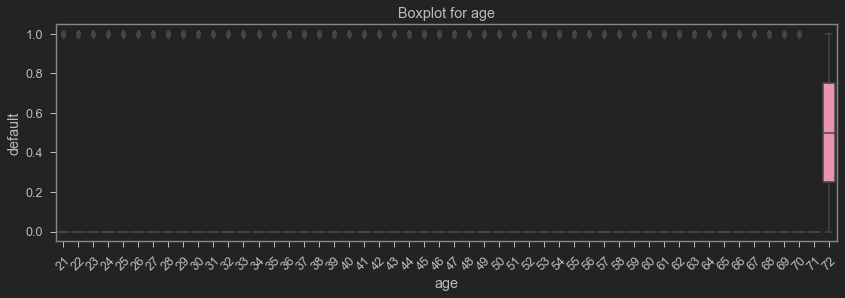

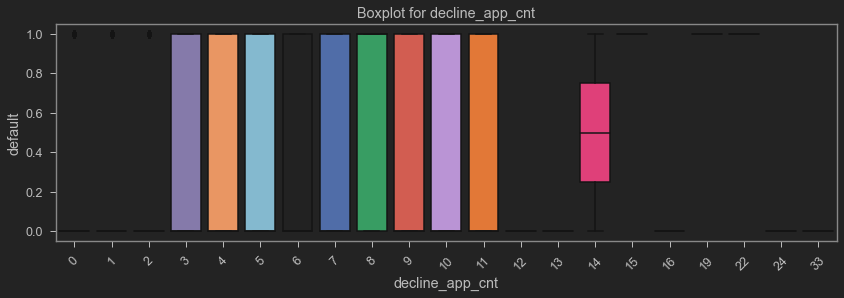

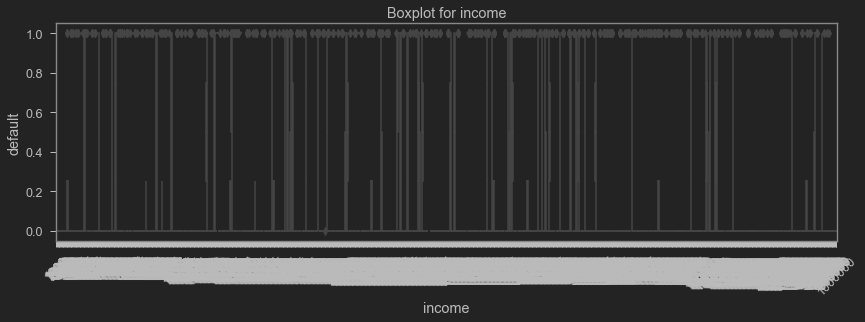

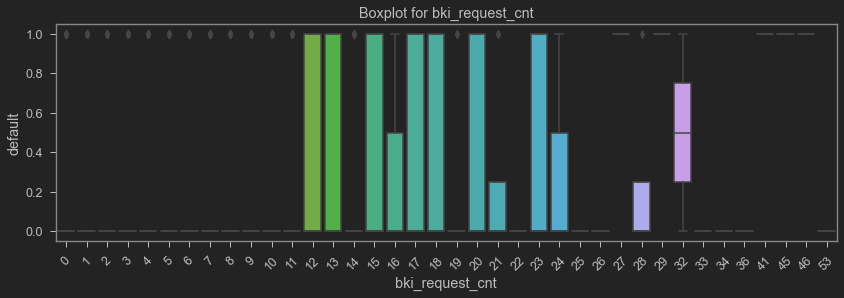

In [43]:
for col in num_cols:
    get_boxplot(col)

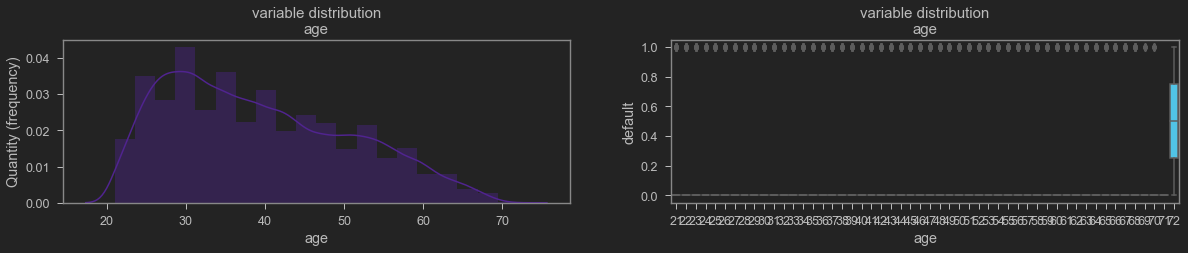

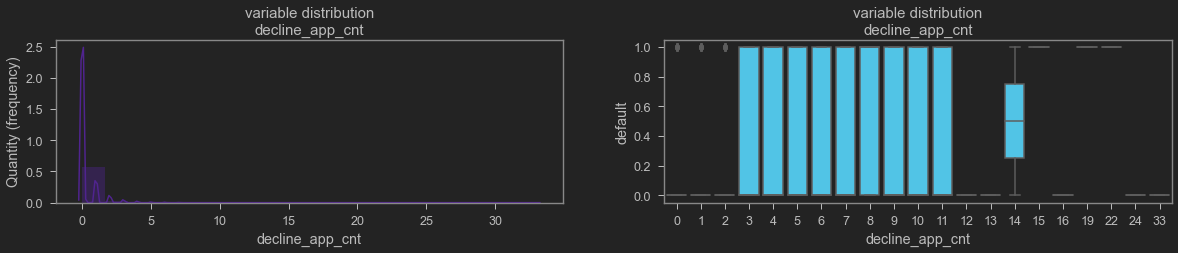

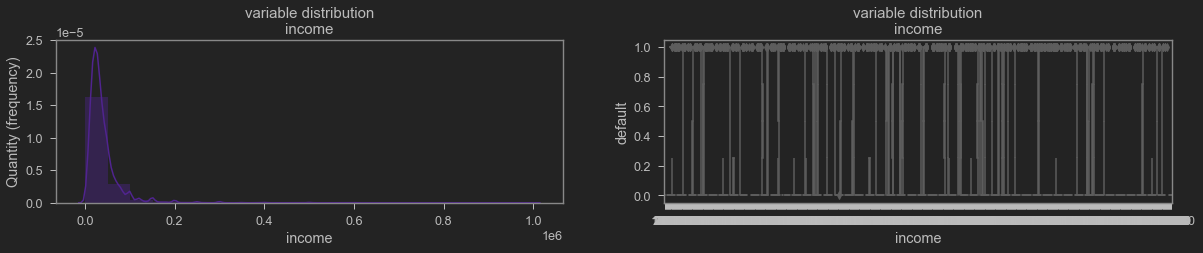

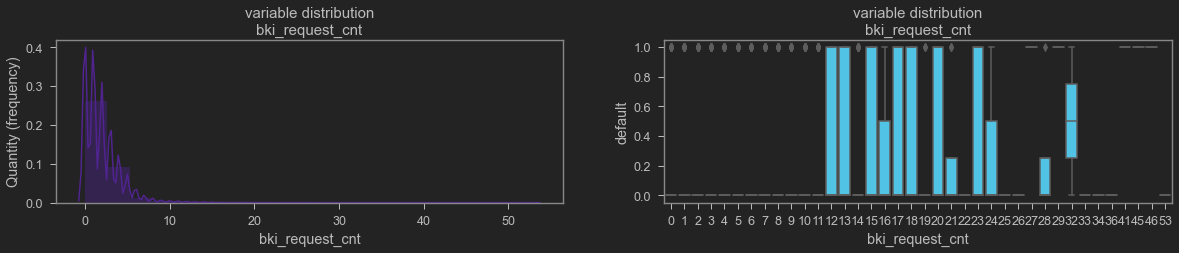

In [46]:
for i in num_cols:
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    sns.distplot(df[i].values, bins=20, color=colors[1])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)
    plt.ylabel('Quantity (frequency)')

    plt.subplot(122)
    sns.boxplot(x =df[i].values, y = df['default'], color=colors[3])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)